# Homework 3
Team: <br/>
Tanush Vinay             1217104733<br/>
Sreenivasan Ramesh       1217310193<br/>
Paarvendhan Puviyarasu   1217390616<br/>
Muskan Singhal           1217107320<br/>



In [1]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import operator
from itertools import islice
from nltk.util import ngrams
import collections
from decimal import *
import numpy as np
from collections import OrderedDict
from numpy import linalg as LA
import matplotlib.pyplot as plt
import itertools
import pprint
import torch
import torch.nn as nn
from torch.autograd import Variable

#Pachage required for tokenizer to work - downloads if it does not exist
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/vasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Exercise 1

Note: We are only tokenizing alphanumeric words and ignoring all punctuations 

In [2]:



######################### Part 1(a) ##############################################################

#Read the given corpus
corpus = open("Plato_Republic.txt", 'r').read()
#Convert it to lower case
corpus = corpus.lower()
#Tokenizer which only tokenizes alpha numeric elements and ignores punctuations and stuff
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(corpus)

def ex1a():
    '''Counts of words and unique words in corpus'''
    print("Total Words ", len(tokens))
    unique_word_count = len(set(tokens))
    print("Unique Words ", unique_word_count)


######################### Part 1(b) ###############################################################



def ex1b(min_length=8, top_words=5):
    '''Prints top 5 highest frequency words with length of at least 8'''

    #one-liner
    #print(list(islice(sorted({k: v for i in range(min_length,len(nltk.ConditionalFreqDist((len(word), word) for word in tokens))+1) for k, v in nltk.ConditionalFreqDist((len(word), word) for word in tokens)[i].items()}.items(), key=operator.itemgetter(1),reverse=True),top_words)))

    #frequency table of all worlds of all lengths
    master_freq_table = nltk.ConditionalFreqDist((len(word), word) for word in tokens)

    # frequency table of all words of min length
    partial_freq_table = dict()
    for i in range(min_length,len(master_freq_table)+1):
        partial_freq_table.update(master_freq_table[i])

    #sort in decending order of frequency
    sorted_partial_list = sorted(partial_freq_table.items(),key=operator.itemgetter(1),reverse=True)

    #pick top words
    print(list(islice(sorted_partial_list,top_words)))

    
######################## Part 1(c) ################################################################

#Create your unigrams,bigrams,unigram frequencies and bigram frequencies
bigrams = ngrams(tokens, 2)
bigram_freq = dict(collections.Counter(bigrams))
unigrams = ngrams(tokens,1)
unigram_freq = dict(collections.Counter(unigrams))

def probability(x1,x2):
    '''bigram probability P(x2|x1) given x1 and x2'''
    numerator = None
    denominator = None
    #check if bigrams and unigrams exist in corpus
    try:
        numerator = bigram_freq[(x1, x2)]
    except:
        print("Bigram does not exist")
        return None
    try:
        denominator = unigram_freq[(x1,)]
    except:
        print("Unigram does not exist")
        return None

    return numerator/denominator

######################## Part 1(D) ###################################################################

def ex1d():
    '''gets the perplexity of the bigram model'''
    #Have to use Decimal object as if we use float, python rounds it to zero as the value of 
    #total becomes very small as we multiply small probability values in the for loop 

    total = Decimal(1)
    for i in range(0, len(tokens)-2): 
        total = total * Decimal(probability(tokens[i],tokens[i+1]))

    perplexity = total ** Decimal(-1*(1/(len(tokens)-1)))
    print('Bigram model preplexity: ', perplexity)




print("\n\nExercise 1.a - Count of words and unique words")
ex1a()

print("\n\nExercise 1.b - Top 5 words with length of 8")
ex1b(min_length=8, top_words=5)

print("\n\nExercise 1.c")
print("Built bigram... ")
n_samples = list(itertools.islice(bigram_freq.items(), 0, 3))
print(n_samples, ".... etc\nLets now try the probability of 'the republic'")
print(probability("the", "republic"))

print("\n\nExercise 1.c")
ex1d()




Exercise 1.a - Count of words and unique words
Total Words  119160
Unique Words  7333


Exercise 1.b - Top 5 words with length of 8
[('certainly', 235), ('knowledge', 152), ('injustice', 111), ('therefore', 109), ('question', 99)]


Exercise 1.c
Built bigram... 
[(('the', 'republic'), 2), (('republic', 'persons'), 1), (('persons', 'of'), 3)] .... etc
Lets now try the probability of 'the republic'
0.0002818489289740699


Exercise 1.c
Bigram model preplexity:  41.23128859784521087914903489


<br/><br/>

######################################################
## Exercise 2a
######################################################



In [3]:
#Prepare Variables
letters = ['h','e','l','l','o']
index_to_letter = {0 : "h",
                   1 : "e",
                   2 : "l",
                   3 : "o"
                   }


#one hot encoding
embedding = OrderedDict()
embedding["h"] = np.array([[1], [0], [0], [0]])
embedding["e"] = np.array([[0], [1], [0], [0]])
embedding["l"] = np.array([[0], [0], [1], [0]])
embedding["o"] = np.array([[0], [0], [0], [1]])

A = np.array([[1, -1, -0.5, 0.5],
              [1,  1, -0.5, -1]])

B = np.array([[1, 1],
              [0.5, 1],
              [-1, 0],
              [0, -0.5]])

R = np.array([[1, 0],
              [0, 1]])

H = np.array([[0], [0]])

#Deducing the characters
#Note: we used argmax to get Y for reproducability
print("Exercise 2a: Predicting the 5 characters")
for i, letter in enumerate(letters):
    H = np.tanh( np.matmul(R,H) + np.matmul(A,embedding[letter]) )
    Y = np.matmul(B,H)
    y_i = index_to_letter[np.argmax(Y, axis = 0)[0]]
    print("y{}: ".format(i), y_i)


Exercise 2a: Predicting the 5 characters
y0:  h
y1:  e
y2:  l
y3:  l
y4:  o


<br/>

## Exercise 2b

In [4]:

learning_rate = 0.1
num_epochs = 20

characters = ['h','e', 'l', 'o']

Y = [3, 2, 2, 1, 0]     # olleh indexes

one_hot = [[[1, 0, 0, 0], 
            [0, 1, 0, 0], 
            [0, 0, 1, 0], 
            [0, 0, 1, 0], 
            [0, 0, 0, 1], 
           ]]  


X = Variable(torch.Tensor(one_hot))
Y = Variable(torch.LongTensor(Y))

num_classes = 4
input_size  = 4
hidden_size = 5  # number of hidden timesteps h_t
num_layers  = 1  # single layer rnn
sequence_length = 5  # |olleh| == 5


class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length

        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True, bias=False)
        self.fc = nn.Linear(hidden_size, num_classes, bias=False)

    def forward(self, x):
        hidden = Variable(torch.zeros(x.size(0), self.num_layers, self.hidden_size))
        # Reshaping input
        x.view(x.size(0), self.sequence_length, self.input_size)
        out, _ = self.rnn(x, hidden)
        out = out.view(-1, self.hidden_size)
        out = self.fc(out)
        return out


rnn = RNN(num_classes, input_size, hidden_size, num_layers)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = rnn(X)
    optimizer.zero_grad()
    loss = loss_function(outputs, Y)
    loss.backward()
    optimizer.step()
    _, idx = outputs.max(1)
    idx = idx.data.numpy()
    res = [characters[char] for char in idx.squeeze()]
    print("Predicted string: ", ''.join(res))

print("\nFinished learning!\n")
print("R = ", rnn.rnn.weight_hh_l0) #R
print("A = ", rnn.rnn.weight_ih_l0) # A
print("B = ", rnn.fc.weight) #B

Predicted string:  oolll
Predicted string:  olllh
Predicted string:  olleh
Predicted string:  oleeh
Predicted string:  oleeh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh
Predicted string:  olleh

Finished learning!

R =  Parameter containing:
tensor([[-1.5341, -0.0621, -0.8918,  0.2294, -1.9080],
        [ 0.1008,  0.3998, -0.6103, -0.7509, -1.4007],
        [ 0.7963,  0.8967, -0.2145, -1.2562,  1.1550],
        [-0.6697, -1.6699,  0.8084,  1.2126, -0.3248],
        [ 1.1156,  1.7711, -0.8050, -1.4099,  0.1900]], requires_grad=True)
A =  Parameter containing:
tensor([[-1.7270,  0.4385,  0.9608, -1.2083],
        [-1.4153, -0.5123,  1.4930, -0.8667],
        [ 1.2325, -1.5124, -1.6147,  

<br/><br/>

######################################################
## Exercise 3
######################################################




## Exercise 3a


<img src='ex3a.jpg'>
Image/PDF 3a.jpg/3a.pdf is present in the folder

## Exercise 3b and 3c

Note: For exercise 3c, the difference in the L2 norm between Yt and peturbed Yt for eps=10^-9 is very small and gets rounded off to zero, and hence there is a warning when we try to do np.log(0)

Peturbation   Difference
0.001           1.2141803312000097
1e-04           1.212935848840391
1e-05           1.0311684365460723
1e-06           0.17903577475132984
1e-07           0.018076691109826296
1e-08           0.001807844540212555


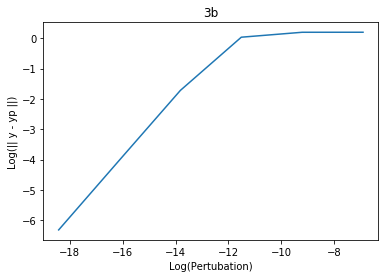

Peturbation   Difference
0.001           1.5576887282601733e-12
1e-04           1.5622419963903562e-13
1e-05           1.5543915340969376e-14
1e-06           1.5700924586837751e-15
1e-07           1.5700924586837752e-16
1e-08           0.0


/Users/vasan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log


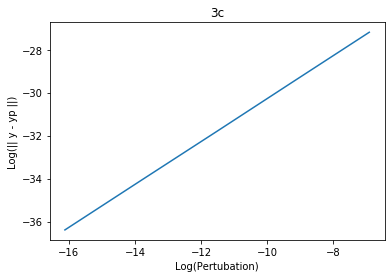

/Users/vasan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log


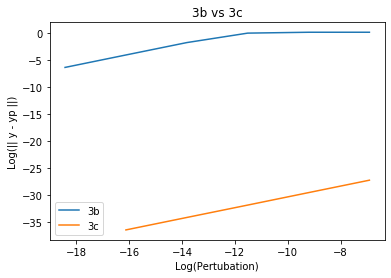

In [5]:
#############################################Part 3(b) ###############################################
pertubations = np.array([np.float32(10e-4), np.float32(10e-5), np.float32(10e-6), np.float32(10e-7), np.float32(10e-8), np.float32(10e-9)])

def get_2_norm_diff(y,yp):
    diff = y - yp
    return LA.norm(diff,2)


def getYt(x, pertubation, extra=False):
    '''returns Yt'''
    A = np.array([[1, 0],
                  [0, 1]])
    B = np.array([[1, 0],
                  [0, 1]])
    R = np.array([[0.5, -1],
                  [-1, 0.5]])
    H = np.array([[0],
                  [0]])

    timesteps = 30
    if not extra:
        x[0][0] = x[0][0] + pertubation
        x[1][0] = x[1][0] - pertubation
    else:
        x[0][0] = x[0][0] + pertubation
        x[1][0] = x[1][0] + pertubation
        
    for i in range(0, timesteps):
        if i == 0:
            H = np.tanh( np.matmul(R, H) + np.matmul(A, x) ) 
            continue
        H = np.tanh( np.matmul(R, H) ) 
    return ( np.matmul(B, H) )


def plot(pertubations, y_diff, title):
    plt.plot(pertubations, y_diff)
    plt.xlabel("Log(Pertubation)")
    plt.ylabel("Log(|| y - yp ||)")
    plt.title(title)
    plt.show()
    

def ex3b():
    y_diff = list()
    yt = getYt([[0], [0]], 0)
    print("Peturbation   Difference")
    for pertubation in pertubations:
        diff = get_2_norm_diff(yt, getYt([[0],[0]], pertubation))
        y_diff.append(diff)
        print(pertubation, "         ", diff)
    plot(np.log(pertubations), np.log(np.array(y_diff)), "3b")
    return np.log(pertubations), np.log(np.array(y_diff))



################################Part 3(C)####################################################################

def ex3c():
    y_diff = list()
    yt = getYt([[2], [1]], 0)
    print("Peturbation   Difference")
    for pertubation in pertubations:
        diff = get_2_norm_diff(yt, getYt([[2],[1]], pertubation))
        y_diff.append(diff)
        print(pertubation, "         ", diff)
    plot(np.log(pertubations), np.log(np.array(y_diff)), "3c")
    return np.log(pertubations), np.log(np.array(y_diff))




peturbations_b, diff_b = ex3b()
peturbations_c, diff_c = ex3c()
plt.plot(peturbations_b, diff_b, label="3b")
plt.plot(peturbations_c, diff_c, label="3c")
plt.legend()
plt.title("3b vs 3c")
plt.xlabel("Log(Pertubation)")
plt.ylabel("Log(|| y - yp ||)")
plt.show()

## Explanation 3b
In the case of 3b we see the L2 norm of the difference between y values at time t with and without perturbation when x=(0, 0)and purtubation=(eps, -eps). We can observe that on increasing the peturbabtion the L2 norm difference increases significantly and caps off at a value. Just as we foresaw with illustration of the deduction in 3a.  

## Explanation 3c
In the case of 3c we see the L2 norm of the difference between the y values at time t with and without perturbation, when x=(2, 1)and purtubation=(eps, -eps). We can observe that on increasing puterbation the value of the L2 norm does not increase by much. This is because he tanh function squashes the values of the hidden state very close to its extremes [-1,+1] which causes vanishing gradient effect. 

Peturbation   Difference
0.001           2.634176986302348e-12
1e-04           2.6341779536784864e-13
1e-05           2.6341779652688685e-14
1e-06           2.6341780252790462e-15
1e-07           2.634178062714127e-16
1e-08           2.6341780159217365e-17


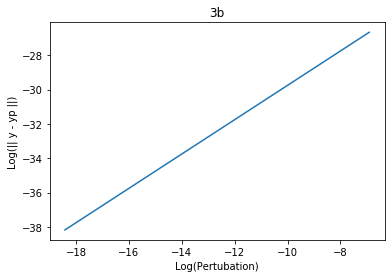

(array([ -6.9077554,  -9.2103405, -11.512925 , -13.815511 , -16.118095 ,
        -18.420681 ], dtype=float32),
 array([-26.66245032, -28.96503505, -31.26762014, -33.57020521,
        -35.87279029, -38.1753754 ]))

In [6]:
def ex_3extra():
    y_diff = list()
    yt = getYt([[0], [0]], 0)
    print("Peturbation   Difference")
    for pertubation in pertubations:
        diff = get_2_norm_diff(yt, getYt([[0],[0]], pertubation, extra=True))
        y_diff.append(diff)
        print(pertubation, "         ", diff)
    plot(np.log(pertubations), np.log(np.array(y_diff)), "3b")
    return np.log(pertubations), np.log(np.array(y_diff))

ex_3extra()

## Explanation 3extra
The puterbation had little effect in this case of having x=(0,0) and puterbation of (eps,eps) because the effect of multiplying the hidden state with R specifically in this case does not significantly increment the values of every dimension of the hidden state from timestep to time step. This overall causes the puterbed y value to not differ much from the unputerbed one. Overall when x=(0,0) we can expect both an increase or a no increase in y value with puterbation as it also depends a lot on the matrices R and A.   